In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages # add_messages is reducer which only append messages, not replaces

In [8]:
class State(TypedDict):
    messages:Annotated[list, add_messages]  # append messages to list using add_message

In [4]:
import os 
from dotenv import load_dotenv
load_dotenv()

True

In [5]:
# Make LLM
from langchain_groq import ChatGroq
from langchain.chat_models import init_chat_model

llm = ChatGroq(model="llama3-8b-8192")

In [6]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000011D979D4CB0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000011D97A99E50>, model_name='llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [7]:
# Node functionality -> will recieve input and invoke LLM and append it into message 
def chatbot(state: State):
    return {"messages" : [llm.invoke(state["messages"])]}  

In [11]:
# Building graph
graph_builder = StateGraph(State)

# Adding node
graph_builder.add_node("llmchatbot", chatbot) # starting and name of the chatbot is "llmchatbot"

# Adding edges
graph_builder.add_edge(START, "llmchatbot") # edge from START -> llmchatbot
graph_builder.add_edge("llmchatbot", END) # edge from llmchatbot -> END

# Compile the graph
graph = graph_builder.compile()

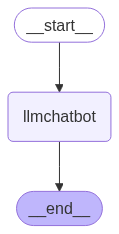

In [12]:
graph

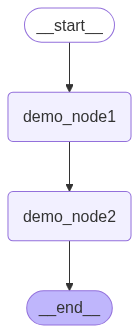

In [14]:
# For PRACTISE
graph_build = StateGraph(State)

# Add node
graph_build.add_node("demo_node1", chatbot)
graph_build.add_node("demo_node2", chatbot)

# Add edges
graph_build.add_edge(START, "demo_node1")
graph_build.add_edge("demo_node1","demo_node2")
graph_build.add_edge("demo_node2",END)

graph_build.compile()

In [19]:
output = graph.invoke({"messages": "Hello"})
answer = output["messages"][-1].content 
print(answer)

Hello! It's nice to meet you. Is there something I can help you with, or would you like to chat?


In [21]:
for event in graph.stream({"messages": "Tell me a joke!"}):
    for value in event.values():
        print(value["messages"][-1].content)

Why couldn't the bicycle stand up by itself?

Because it was two-tired!

Hope that made you laugh!
